In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('Apply_Rate_2019.csv')
dataframe

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5,0,1/21/2018,-7.613810e+18
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5,0,1/21/2018,-1.361820e+18
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5,1,1/21/2018,-1.361820e+18
3,0.000000,0.207074,0.000000,0.021350,0.021491,0.0,2,0,1/21/2018,-1.340660e+18
4,NaN,NaN,0.000000,0.017114,0.017341,0.0,12,0,1/21/2018,3.137310e+18
...,...,...,...,...,...,...,...,...,...,...
1048570,0.000000,0.000000,1.271010,0.000001,0.035763,NaN,3,0,1/27/2018,7.929050e+18
1048571,0.000000,0.000000,0.000000,0.027681,0.027452,1.0,2,0,1/27/2018,-5.302120e+18
1048572,6.580224,0.047161,2.387810,0.010552,0.011476,1.0,12,0,1/27/2018,-6.998220e+18
1048573,0.000000,0.039594,0.998885,0.016936,0.016895,0.0,24,0,1/27/2018,-7.435860e+18


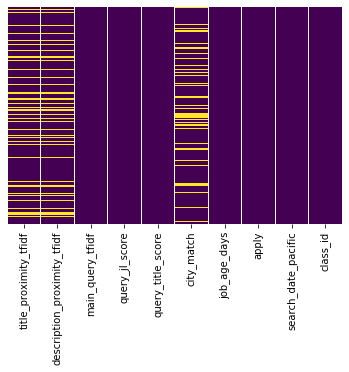

In [3]:
sns.heatmap(dataframe.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')#empty values present, data cleaning needed

In [4]:
df = dataframe.dropna()

In [5]:
df

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5,0,1/21/2018,-7.613810e+18
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5,0,1/21/2018,-1.361820e+18
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5,1,1/21/2018,-1.361820e+18
3,0.000000,0.207074,0.000000,0.021350,0.021491,0.0,2,0,1/21/2018,-1.340660e+18
5,0.000000,0.000000,0.000000,0.014738,0.012877,0.0,12,0,1/21/2018,-4.397800e+18
...,...,...,...,...,...,...,...,...,...,...
1048569,0.000000,0.009556,1.158481,0.010897,0.012988,1.0,3,0,1/27/2018,8.980390e+18
1048571,0.000000,0.000000,0.000000,0.027681,0.027452,1.0,2,0,1/27/2018,-5.302120e+18
1048572,6.580224,0.047161,2.387810,0.010552,0.011476,1.0,12,0,1/27/2018,-6.998220e+18
1048573,0.000000,0.039594,0.998885,0.016936,0.016895,0.0,24,0,1/27/2018,-7.435860e+18


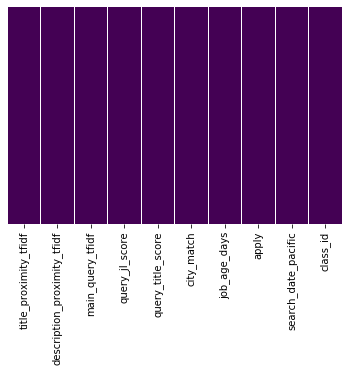

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')#empty values present, data cleaning needed

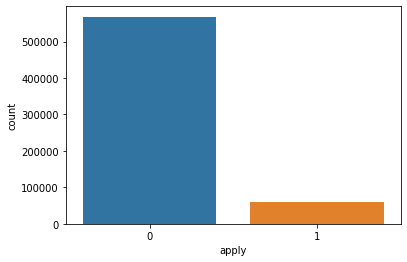

In [7]:
sns.countplot(df['apply'])

In [8]:
df['apply'].value_counts()

0    568153
1     58610
Name: apply, dtype: int64

In [9]:
df_zero_samples = df[df['apply']==0].sample(n=58610)

In [10]:
df_zero_samples

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
254304,0.000000,0.000000,0.000000,0.017126,0.017096,0.0,7,0,1/23/2018,7.711990e+18
408855,8.726306,0.104382,2.082432,0.018559,0.016042,0.0,1,0,1/24/2018,8.980390e+18
884287,23.634808,0.040852,5.084928,0.009901,0.008975,1.0,6,0,1/26/2018,4.315420e+18
73423,13.284828,0.045873,4.030698,0.014108,0.031273,0.0,7,0,1/21/2018,-3.214320e+18
822031,0.000000,0.000000,0.000000,0.013753,0.008621,1.0,26,0,1/26/2018,4.315420e+18
...,...,...,...,...,...,...,...,...,...,...
857106,0.000000,0.000000,1.489801,0.020579,0.025352,1.0,3,0,1/26/2018,4.315420e+18
6804,0.000000,0.000000,0.650699,0.000001,0.010309,1.0,11,0,1/21/2018,1.861520e+18
236946,0.000000,0.000000,0.000000,0.014254,0.024854,0.0,21,0,1/23/2018,-6.119410e+18
578356,17.475338,0.036489,4.471628,0.013123,0.013573,1.0,8,0,1/24/2018,-7.268110e+18


In [11]:
df_one_samples = df[df['apply']==1]

In [12]:
df_one_samples

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5,1,1/21/2018,-1.361820e+18
7,0.000000,0.000000,0.000000,0.010181,0.018063,0.0,0,1,1/21/2018,-7.435860e+18
37,0.000000,0.000000,0.000000,0.009944,0.006294,1.0,4,1,1/21/2018,-2.363590e+18
61,14.399108,0.044760,4.365371,0.030255,0.031584,1.0,19,1,1/21/2018,-4.397800e+18
68,0.000000,0.000000,0.000000,0.022266,0.023098,0.0,18,1,1/21/2018,-9.049390e+18
...,...,...,...,...,...,...,...,...,...,...
1048473,12.546774,0.021392,3.801130,0.012382,0.034462,1.0,10,1,1/27/2018,8.238500e+18
1048524,13.478161,0.231286,3.369540,0.017313,0.018503,0.0,24,1,1/27/2018,-7.706970e+18
1048546,36.183746,0.085502,7.845264,0.025394,0.257945,0.0,15,1,1/27/2018,-2.634000e+18
1048549,20.270157,0.058914,4.400598,0.023505,0.024383,0.0,1,1,1/27/2018,-7.435860e+18


In [13]:
df_new = pd.concat([df_zero_samples,df_one_samples])

In [14]:
df_new

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
254304,0.000000,0.000000,0.000000,0.017126,0.017096,0.0,7,0,1/23/2018,7.711990e+18
408855,8.726306,0.104382,2.082432,0.018559,0.016042,0.0,1,0,1/24/2018,8.980390e+18
884287,23.634808,0.040852,5.084928,0.009901,0.008975,1.0,6,0,1/26/2018,4.315420e+18
73423,13.284828,0.045873,4.030698,0.014108,0.031273,0.0,7,0,1/21/2018,-3.214320e+18
822031,0.000000,0.000000,0.000000,0.013753,0.008621,1.0,26,0,1/26/2018,4.315420e+18
...,...,...,...,...,...,...,...,...,...,...
1048473,12.546774,0.021392,3.801130,0.012382,0.034462,1.0,10,1,1/27/2018,8.238500e+18
1048524,13.478161,0.231286,3.369540,0.017313,0.018503,0.0,24,1,1/27/2018,-7.706970e+18
1048546,36.183746,0.085502,7.845264,0.025394,0.257945,0.0,15,1,1/27/2018,-2.634000e+18
1048549,20.270157,0.058914,4.400598,0.023505,0.024383,0.0,1,1,1/27/2018,-7.435860e+18


In [22]:
df_new.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,class_id
count,117220.000000,117220.000000,117220.000000,117220.000000,117220.000000,117220.000000,117220.000000,117220.000000,1.172200e+05
mean,5.533049,0.085798,1.803695,0.016123,0.034464,0.540795,10.306680,0.500000,-5.297882e+17
std,8.862476,0.241717,1.974575,0.009965,0.046688,0.498335,17.440566,0.500002,5.530194e+18
min,0.000000,0.000000,0.000000,0.000001,0.000001,0.000000,0.000000,0.000000,-9.049390e+18
25%,0.000000,0.000000,0.000000,0.010472,0.012048,0.000000,2.000000,0.000000,-4.530020e+18
50%,0.000000,0.000000,1.135810,0.014896,0.019246,1.000000,6.000000,0.500000,-1.614080e+18
75%,11.445062,0.061192,3.466835,0.019814,0.036461,1.000000,14.000000,1.000000,4.315420e+18
max,57.420143,5.529913,11.027440,0.125587,1.049201,1.000000,1253.000000,1.000000,9.204120e+18


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117220 entries, 992092 to 1048550
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   title_proximity_tfidf        117220 non-null  float64
 1   description_proximity_tfidf  117220 non-null  float64
 2   main_query_tfidf             117220 non-null  float64
 3   query_jl_score               117220 non-null  float64
 4   query_title_score            117220 non-null  float64
 5   city_match                   117220 non-null  float64
 6   job_age_days                 117220 non-null  int64  
 7   apply                        117220 non-null  int64  
 8   search_date_pacific          117220 non-null  object 
 9   class_id                     117220 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 9.8+ MB


In [24]:
df_new_corr = df_new.corr()
df_new_corr

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,class_id
title_proximity_tfidf,1.000000,0.109613,0.695531,0.174480,0.346060,-0.063634,0.062015,0.067075,0.006729
description_proximity_tfidf,0.109613,1.000000,0.019206,0.118552,0.007274,-0.014899,0.025275,-0.008970,-0.004257
main_query_tfidf,0.695531,0.019206,1.000000,0.041635,0.218635,-0.067940,0.076711,0.055553,0.028554
query_jl_score,0.174480,0.118552,0.041635,1.000000,0.301903,-0.019678,0.027495,0.058048,0.087689
query_title_score,0.346060,0.007274,0.218635,0.301903,1.000000,-0.051070,0.039356,0.071239,0.054637
city_match,-0.063634,-0.014899,-0.067940,-0.019678,-0.051070,1.000000,0.007007,0.005957,-0.008075
job_age_days,0.062015,0.025275,0.076711,0.027495,0.039356,0.007007,1.000000,-0.020277,0.003576
apply,0.067075,-0.008970,0.055553,0.058048,0.071239,0.005957,-0.020277,1.000000,-0.003145
class_id,0.006729,-0.004257,0.028554,0.087689,0.054637,-0.008075,0.003576,-0.003145,1.000000


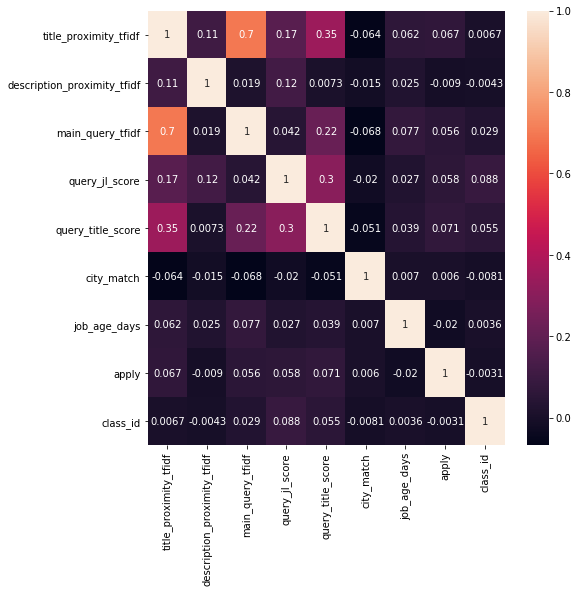

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new_corr, annot = True)

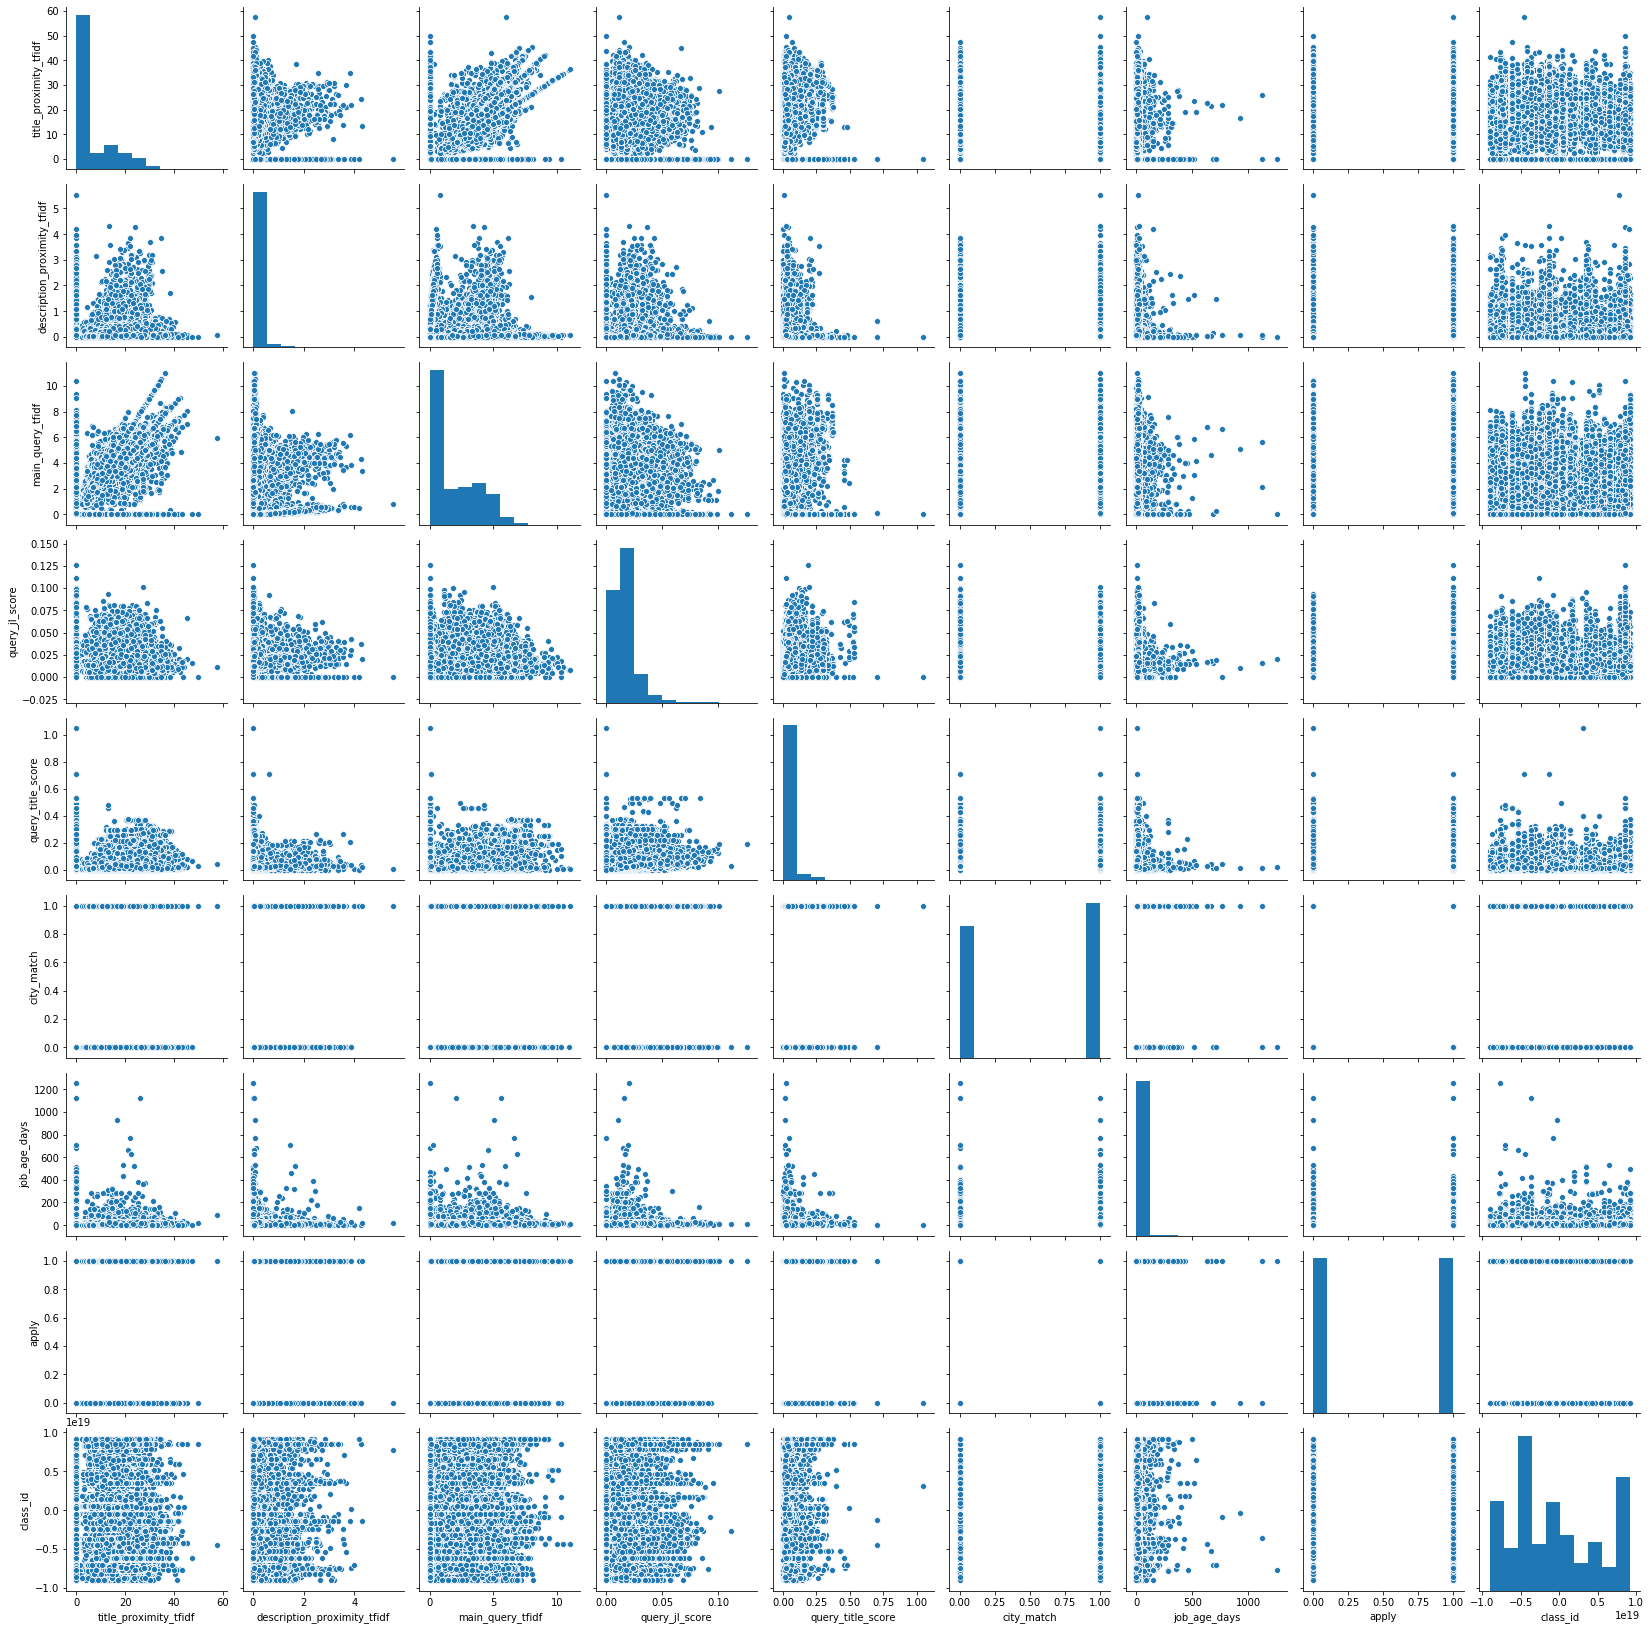

In [27]:
sns.pairplot(df_new)

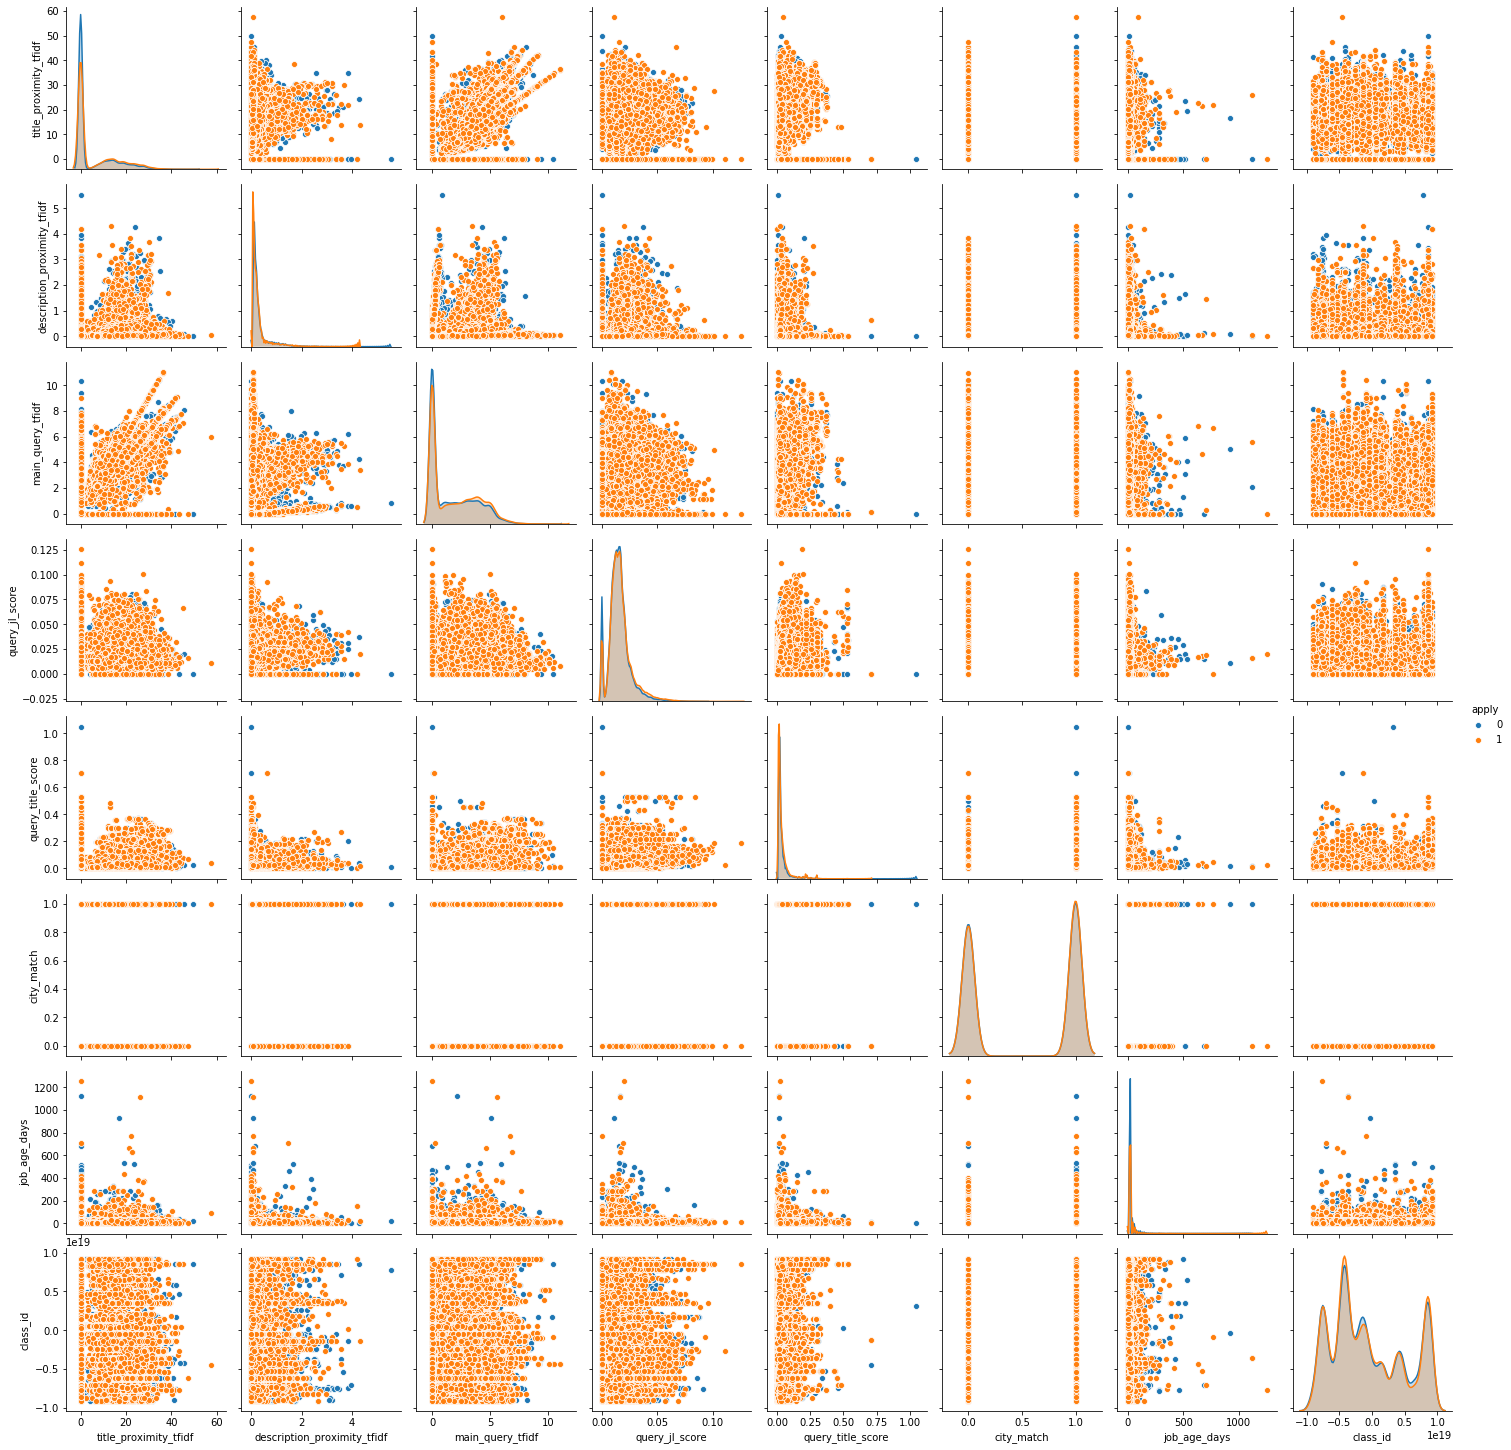

In [29]:
sns.pairplot(df_new, hue = 'apply')

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [30]:
df_new.columns

Index(['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'apply', 'search_date_pacific', 'class_id'],
      dtype='object')

In [33]:
X = df_new[['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'class_id']]
X

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
992092,0.000000,0.000000,3.561411,0.000001,0.013889,1.0,17,4.449050e+18
769768,0.000000,0.000000,5.244627,0.008573,0.030238,0.0,7,-6.119410e+18
935266,0.000000,0.000000,0.000000,0.026983,0.031449,0.0,3,6.486710e+18
616471,0.000000,0.000000,0.000000,0.040506,0.034032,1.0,10,-7.054510e+18
863130,0.000000,0.000000,2.151213,0.031255,0.036511,0.0,6,-4.397800e+18
...,...,...,...,...,...,...,...,...
1048473,12.546774,0.021392,3.801130,0.012382,0.034462,1.0,10,8.238500e+18
1048524,13.478161,0.231286,3.369540,0.017313,0.018503,0.0,24,-7.706970e+18
1048546,36.183746,0.085502,7.845264,0.025394,0.257945,0.0,15,-2.634000e+18
1048549,20.270157,0.058914,4.400598,0.023505,0.024383,0.0,1,-7.435860e+18


In [34]:
y = df_new['apply']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred_log_reg = logmodel.predict(X_test)
pred_log_reg

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
y_test

411451    1
341108    0
32507     1
814846    1
719275    1
         ..
216310    0
309834    0
516646    0
249515    1
422575    1
Name: apply, Length: 35166, dtype: int64

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred_log_reg))
print(classification_report(y_test, pred_log_reg))

[[ 7016 10627]
 [ 6813 10710]]
              precision    recall  f1-score   support

           0       0.51      0.40      0.45     17643
           1       0.50      0.61      0.55     17523

    accuracy                           0.50     35166
   macro avg       0.50      0.50      0.50     35166
weighted avg       0.50      0.50      0.50     35166



# Decision Tress

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
pred_dtree = dtree.predict(X_test)
print(confusion_matrix(y_test, pred_dtree))
print('\n')
print(classification_report(y_test, pred_dtree))

[[9014 8629]
 [8727 8796]]


              precision    recall  f1-score   support

           0       0.51      0.51      0.51     17643
           1       0.50      0.50      0.50     17523

    accuracy                           0.51     35166
   macro avg       0.51      0.51      0.51     35166
weighted avg       0.51      0.51      0.51     35166



# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200, verbose =100)
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 200
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
building tree 2 of 200
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
building tree 3 of 200
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
building tree 4 of 200
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
building tree 5 of 200
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
building tree 6 of 200
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s
building tree 7 of 200
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
building tree 8 of 200
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
building tree 9 of 200
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining: 

[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   15.3s remaining:    0.0s
building tree 80 of 200
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   15.6s remaining:    0.0s
building tree 81 of 200
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   15.9s remaining:    0.0s
building tree 82 of 200
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   16.0s remaining:    0.0s
building tree 83 of 200
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   16.2s remaining:    0.0s
building tree 84 of 200
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   16.4s remaining:    0.0s
building tree 85 of 200
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   16.6s remaining:    0.0s
building tree 86 of 200
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   16.8s remaining:    0.0s
building tree 87 of 200
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   17.1s remaining:    0.0s
building tree 88 of 200
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   17.3s rem

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=100, warm_start=False)

In [44]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

# Scaling using Standard Scaler

In [46]:
from sklearn.preprocessing import StandardScaler #scaling the data
scaler = StandardScaler()
scaler.fit(df_new.drop(['apply', 'search_date_pacific'], axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_features = scaler.transform(df_new.drop(['apply', 'search_date_pacific'], axis = 1))

In [49]:
col = df_new.columns.drop(['apply', 'search_date_pacific'])
col

Index(['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'class_id'],
      dtype='object')

In [50]:
df_feat = pd.DataFrame(scaled_features, columns=col)
df_feat

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
0,-0.624326,-0.354954,0.890178,-1.617960,-0.440683,0.921482,0.383780,0.900305
1,-0.624326,-0.354954,1.742627,-0.757673,-0.090505,-1.085208,-0.189598,-1.010750
2,-0.624326,-0.354954,-0.913464,1.089896,-0.064562,-1.085208,-0.418949,1.268767
3,-0.624326,-0.354954,-0.913464,2.446986,-0.009252,0.921482,-0.017584,-1.179841
4,-0.624326,-0.354954,0.175997,1.518574,0.043843,-1.085208,-0.246936,-0.699438
...,...,...,...,...,...,...,...,...
117215,0.791399,-0.266455,1.011581,-0.375448,-0.000025,0.921482,-0.017584,1.585537
117216,0.896493,0.601895,0.793007,0.119451,-0.341859,-1.085208,0.785145,-1.297823
117217,3.458495,-0.001223,3.059694,0.930355,4.786686,-1.085208,0.269105,-0.380497
117218,1.662873,-0.111221,1.315176,0.740776,-0.215913,-1.085208,-0.533625,-1.248799


# Dimension Reduction using Principal Components Analysis

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df_feat)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [52]:
x_pca = pca.transform(df_feat)

In [53]:
print(df_feat.shape)
print(x_pca.shape)

(117220, 8)
(117220, 2)


In [54]:
x_pca_tab = pd.DataFrame(x_pca, columns = ['First Component', 'Second Component'])
x_pca_tab

,First Component,Second Component
0,-0.582628,-1.144342
1,0.308199,-1.635577
2,-0.489166,1.598958
3,-0.415888,1.616042
4,0.167116,0.681638
...,...,...
117215,0.918613,-0.261144
117216,1.058178,-0.994877
117217,6.293128,-0.213995
117218,1.827697,-1.063863


Text(0, 0.5, 'Second Principal Component')

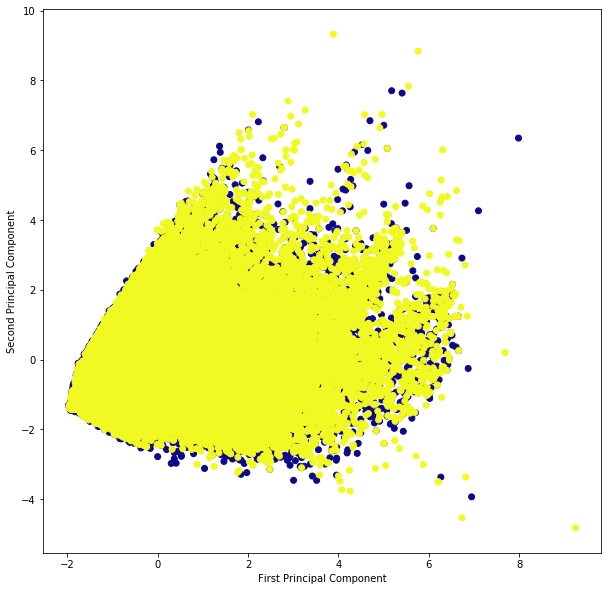

In [56]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca_tab['First Component'],x_pca_tab['Second Component'], c = df_new['apply'], cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Train Test Split on PCA

In [59]:
X = x_pca_tab

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [61]:
X_train

,First Component,Second Component
55809,-0.812936,0.301927
72776,-1.462194,0.127619
4330,1.405091,-0.286135
52302,-1.353096,-0.212265
59286,-1.188972,0.749736
...,...,...
5695,-0.181820,-0.264093
73542,-1.023917,0.015237
83281,-0.788189,1.113501
83467,1.163020,-1.448808


# Support Vector Machine on PCA

In [65]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
pred_svm = model.predict(X_test)
print(confusion_matrix(y_test, pred_svm))
print('\n')
print(classification_report(y_test, pred_svm))

[[10802  6841]
 [ 9431  8092]]


              precision    recall  f1-score   support

           0       0.53      0.61      0.57     17643
           1       0.54      0.46      0.50     17523

    accuracy                           0.54     35166
   macro avg       0.54      0.54      0.53     35166
weighted avg       0.54      0.54      0.53     35166



# K Nearest Neigbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [69]:
pred_knn = knn.predict(X_test)
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

[[8434 9209]
 [8642 8881]]
              precision    recall  f1-score   support

           0       0.49      0.48      0.49     17643
           1       0.49      0.51      0.50     17523

    accuracy                           0.49     35166
   macro avg       0.49      0.49      0.49     35166
weighted avg       0.49      0.49      0.49     35166



# Deep Neural Network¶

In [16]:
X = df_new[['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'class_id']]
X

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
254304,0.000000,0.000000,0.000000,0.017126,0.017096,0.0,7,7.711990e+18
408855,8.726306,0.104382,2.082432,0.018559,0.016042,0.0,1,8.980390e+18
884287,23.634808,0.040852,5.084928,0.009901,0.008975,1.0,6,4.315420e+18
73423,13.284828,0.045873,4.030698,0.014108,0.031273,0.0,7,-3.214320e+18
822031,0.000000,0.000000,0.000000,0.013753,0.008621,1.0,26,4.315420e+18
...,...,...,...,...,...,...,...,...
1048473,12.546774,0.021392,3.801130,0.012382,0.034462,1.0,10,8.238500e+18
1048524,13.478161,0.231286,3.369540,0.017313,0.018503,0.0,24,-7.706970e+18
1048546,36.183746,0.085502,7.845264,0.025394,0.257945,0.0,15,-2.634000e+18
1048549,20.270157,0.058914,4.400598,0.023505,0.024383,0.0,1,-7.435860e+18


In [17]:
y = df_new['apply']

In [27]:
y

254304     0
408855     0
884287     0
73423      0
822031     0
          ..
1048473    1
1048524    1
1048546    1
1048549    1
1048550    1
Name: apply, Length: 117220, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [28]:
y_train

768427    0
239571    1
665791    0
773099    0
10788     1
         ..
442598    0
252557    1
424502    1
427998    1
309735    0
Name: apply, Length: 82054, dtype: int64

In [29]:
y_test

411451    1
140113    0
32507     1
814846    1
719275    1
         ..
829796    0
640490    0
652036    0
249515    1
422575    1
Name: apply, Length: 35166, dtype: int64

In [38]:
#configure the neurak network
# Import `Sequential` from `keras.models`
from keras.models import Sequential
from sklearn import metrics
import tensorflow as tf

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(8,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='relu'))

In [39]:
#information on the created model
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


[array([[ 5.1142991e-01,  1.2048894e-01, -3.8886070e-04,  3.8319194e-01,
         -2.4570981e-01, -3.4236175e-01,  2.8009188e-01,  3.0180603e-01,
          2.9506189e-01,  3.6917812e-01,  1.8468094e-01,  1.1749566e-02],
        [-3.1264818e-01, -1.5608478e-01,  3.4486520e-01,  4.8608136e-01,
         -1.8031120e-02, -1.1247650e-01,  2.5743014e-01, -3.4660232e-01,
         -4.2894095e-01,  4.9774170e-01, -2.8578997e-02, -2.2194862e-02],
        [-6.9897592e-02, -5.3899699e-01,  2.9366213e-01,  3.8256168e-02,
          2.7330118e-01, -2.7326202e-01, -2.3108339e-01,  1.4940238e-01,
          4.8824728e-02,  2.5249553e-01,  5.0428081e-01, -6.3586324e-02],
        [ 3.0508912e-01, -2.0004031e-01,  2.2315919e-02, -3.4228444e-01,
         -5.1634753e-01,  5.1805568e-01,  2.8124076e-01,  1.5536904e-01,
         -4.0518373e-01, -1.3048786e-01,  3.6405671e-01, -1.1532825e-01],
        [ 1.9641167e-01,  1.4183980e-01,  3.9008850e-01, -5.3898758e-01,
         -4.2963842e-01,  3.8309151e-01, -3.077

In [40]:
#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=1, batch_size=1, verbose=1)

Epoch 1/1
82054/82054 [==============================] - 154s 2ms/step - loss: 7.6554 - accuracy: 0.0000e+00


In [41]:
y_pred = model.predict(X_test)

In [42]:
score = model.evaluate(X_test, y_test,verbose=1)

35166/35166 [==============================] - 1s 31us/step


In [43]:
score

[7.692780694504318, 0.0]

In [46]:
 y_pred.dtype

dtype('float32')

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred.round()))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [52]:
np.version.version

'1.18.1'

In [53]:
tf.__version__

'1.14.0'